data type original image: uint8
shape original image: (450, 600, 3)
data type: uint8
shape: (450, 600)
min value: 0
max value: 255


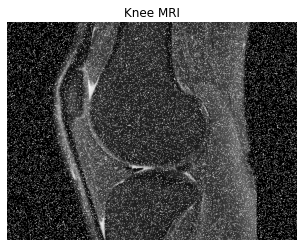

In [74]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import img_as_ubyte
from skimage.util import random_noise

im = imageio.imread('D:\KULIAH\SEMESTER 5\PENGOLAHAN CITRA MEDIKA\FOTO\kneemri8.jpg')      #dark image
imm= color.rgb2gray(im)
im1 = random_noise(imm,mode='salt',amount=0.1)            
img = img_as_ubyte(im1)                                     

print('data type original image:', im.dtype)
print('shape original image:', im.shape)
print('data type:', img.dtype)
print('shape:', img.shape)
print('min value:', img.min())
print('max value:', img.max())

plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Knee MRI')
plt.show()

Histogram of Knee MRI

Text(0.5, 1.0, 'Histogram of Knee MRI')

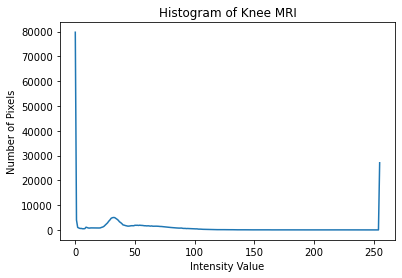

In [75]:
import scipy.ndimage as ndi

hist = ndi.histogram(img, min=0, max=255, bins=256)
plt.plot(hist, label='histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Knee MRI')

Non Linear Filter to Reduce Salt Noise

Text(0.5, 1.0, 'Result of Minimum Filter')

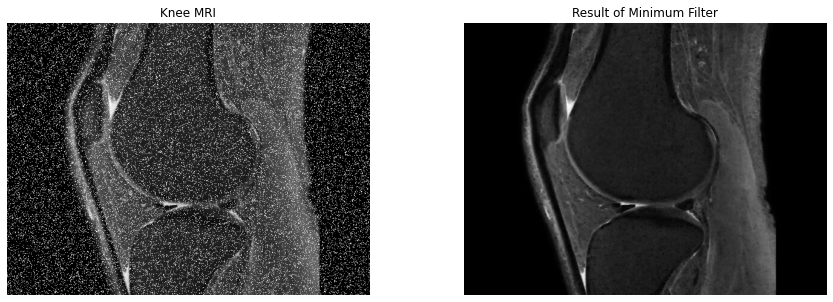

In [76]:
im_min =ndi.minimum_filter(img,size=3)
img_min = img_as_ubyte(im_min)

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].imshow(img,cmap='gray')
axes[0].axis('off')
axes[0].set_title('Knee MRI')
axes[1].imshow(img_min,cmap='gray')
axes[1].axis('off')
axes[1].set_title('Result of Minimum Filter')

Text(0, 0.5, 'Number of Pixel')

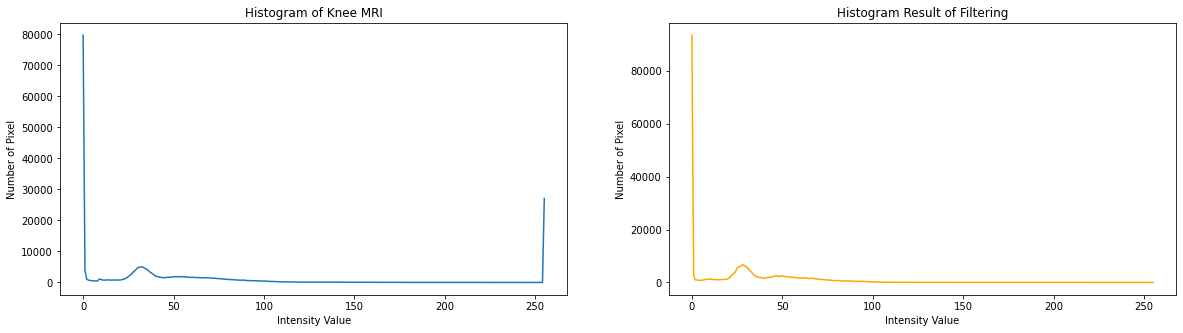

In [77]:
hist_min = ndi.histogram(img_min, min=0, max=255, bins=256)

fig, axes = plt.subplots(1,2,figsize=(20,5))
axes[0].plot(hist)
axes[0].set_title('Histogram of Knee MRI')
axes[0].set_xlabel('Intensity Value')
axes[0].set_ylabel('Number of Pixel')
axes[1].plot(hist_min, color='orange')
axes[1].set_title('Histogram Result of Filtering')
axes[1].set_xlabel('Intensity Value')
axes[1].set_ylabel('Number of Pixel')

Otsu Thresholding

In [78]:
from skimage import filters

threshold = filters.threshold_otsu(img_min) 
threshold

36

Contour pada Threshold

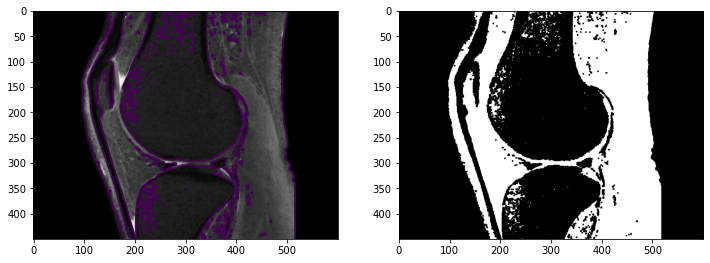

In [79]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(img_min, cmap='gray')
ax[0].contour(img_min, [threshold]) 
ax[1].imshow(img_min > threshold, cmap='gray')

Binary Image

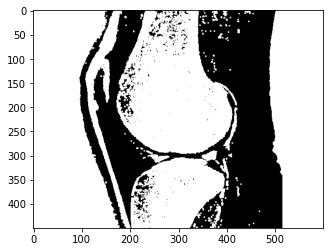

In [80]:
binary_image = img_min < filters.threshold_otsu(img_min)
plt.imshow(binary_image, cmap='gray')

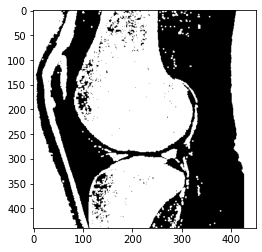

In [81]:
img_cut = binary_image[10:450,90:540]
plt.imshow(img_cut, cmap='gray')

Morphological Filtering

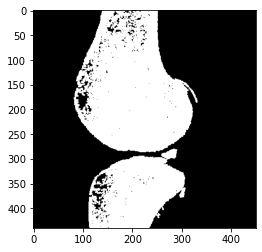

In [82]:
from skimage import morphology

#Remove small objects
only_large = morphology.remove_small_objects(img_cut, min_size=20000)
plt.imshow(only_large, cmap='gray')

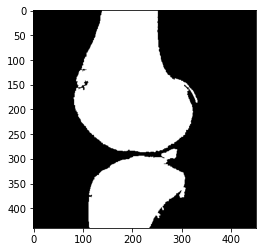

In [83]:
#Fill small holes
image_segmented = np.logical_not(morphology.remove_small_objects(np.logical_not(only_large), 
                                                                min_size=11800))
plt.imshow(image_segmented, cmap='gray')

Object Labelling

In [84]:
labels, nlabels = ndi.label(image_segmented)

label_arrays = []
print('There are {} separate components / objects detected.'.format(nlabels))

There are 2 separate components / objects detected.


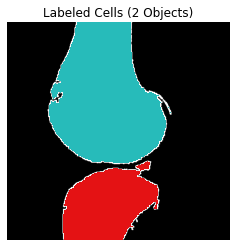

In [85]:
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(image_segmented, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Objects)'.format(nlabels))
plt.show()

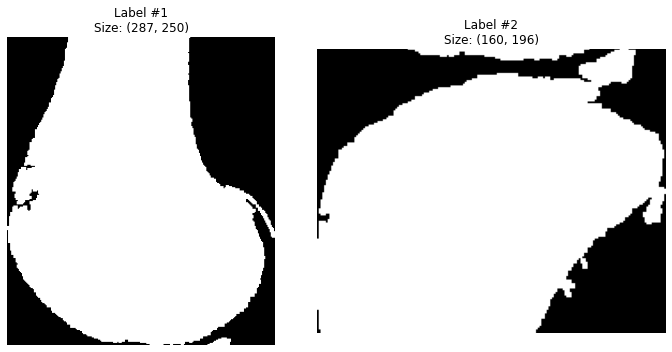

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for ii, obj_indices in enumerate(ndi.find_objects(labels)):
    cell = image_segmented[obj_indices]
    axes[ii].imshow(cell, cmap='gray')
    axes[ii].axis('off')
    axes[ii].set_title('Label #{}\nSize: {}'.format(ii+1, cell.shape))

plt.tight_layout()
plt.show()

Label Image Regions

In [87]:
import math
import pandas as pd
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

label_img = label(image_segmented)
regions = regionprops(label_img)
label_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

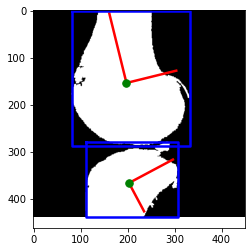

In [88]:
fig, ax = plt.subplots()
ax.imshow(image_segmented, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
plt.show()

In [89]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))
                                                

In [90]:
df1=pd.DataFrame(props)
df1

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length
0,153.907209,197.593491,0.241826,304.315777,218.175335
1,366.704486,202.931356,-1.081058,211.816852,136.650535


In [91]:
df1.to_excel(r'D:\KULIAH\SEMESTER 5\PENGOLAHAN CITRA MEDIKA\DataPCM_07311940000004_Anastasia.xlsx',
             sheet_name='segmentation_data')  
